In [1]:
#filename : pj03_concat2.ipnb
# 2022-12-06 khm

# 수정 01
# 데이터 제목, 오프닝 중복 제거 (2년치 데이터 붙이면서 중복되는 데이터 제거)
# 중복값 제거, 마지막 항목만 남김 ( 먼저 개봉한 )
# df_dup = df_con.drop_duplicates(subset=['title', 'opening_date'], keep='last')

# 수정 02
# 2010 년 이후 ~ 2019 년 이하 데이터만 남김
#df_time = df_dup[(df_dup['opening_date'] >= '2010-01-01') & (df_dup['opening_date'] < '2020-01-01')]

# 수정 03 (진행중)
# 감독지수, 배우지수

# 수정 04 (진행주)
# 왓차피디아 평점, SNS 지수


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 전처리

In [3]:
def df_clear(data):
    df = data 
    df.columns = ['ranking', 'title', 'opening_date', 'sales',
             'sales_percent', 'sum_sales', 'audience', 'sum_audience', 
            'screens', 'shows', 'main_nation', 'nation', 
              'producer', 'distributor', 'rated', 
              'genre', 'director', 'actor'] 
    df.drop(columns=['ranking', 'sales', 'sales_percent', 'audience', 'nation'], inplace=True) # 필요없는 필드 제거
    df.dropna(subset=['opening_date','genre','director','actor'], inplace=True) # NaN 결측치 제거
    df = df[~df['genre'].str.contains('성인물', na=False)] # 성인물 장르 제거
    df.fillna(value={'rated':'전체관람가'}, inplace=True) # 등급 - 전체관람가 채우기
    return df

#### 데이터 불러오기

In [4]:
df = pd.read_excel('./data/KOBIS_기간별박스오피스_2018-01-01_2019-12-31.xlsx')
df.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,극한직업,2019-01-23,139651845516,0.039,139651845516,16265618,16265618,2003,292584,한국,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
1,2,어벤져스: 엔드게임,2019-04-24,122182694160,0.034,122182694160,13934592,13934592,2835,242001,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."


In [5]:
df.shape

(6530, 18)

In [6]:
data1 = df_clear(df)
data1.shape

(1634, 13)

In [7]:
data1.head(1)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."


In [8]:
df2 = pd.read_excel('./data/KOBIS_기간별박스오피스_2016-01-01_2017-12-31.xlsx')
df2.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,택시운전사,2017-08-02,95853645649,0.029,95853645649,12186327,12186327,1906,184075,한국,한국,더램프(주),(주)쇼박스,15세이상관람가,드라마,장훈,"이수민,송강호,토마스 크레취만,유해진,류준열,박혁권,최귀화,이창섭,이호균,서정우,송..."
1,2,부산행,2016-07-20,93182579048,0.028,93182579048,11566862,11566862,1788,151350,한국,한국,(주)영화사레드피터,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"액션,스릴러",연상호,"공유,김정희,정유미,김율호,이주원,이영욱,마동석,김찬호,김운,최우식,안소희,김의성,..."


In [9]:
df2.shape

(5865, 18)

In [10]:
data2 = df_clear(df2)
data2.shape

(2002, 13)

In [11]:
df3 = pd.read_excel('./data/KOBIS_기간별박스오피스_2014-01-01_2015-12-31.xlsx')
df3.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,명량,2014-07-30,135753219310,0.043,135753219310,17615039,17615039,1587,188646,한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,15세이상관람가,"사극,액션",김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,..."
1,2,국제시장,2014-12-17,110930943730,0.035,110930943730,14261581,14261581,1044,212664,한국,한국,"(주)제이케이필름,(주)씨제이이엔엠",(주)씨제이이엔엠,12세이상관람가,드라마,윤제균,"황정민,김윤진,오달수,정진영,장영남,라미란,김슬기,정영기,맹세창,김동원,김현중,김지..."


In [12]:
data3 = df_clear(df3)
data3.shape

(1753, 13)

In [13]:
df4 = pd.read_excel('./data/KOBIS_기간별박스오피스_2012-01-01_2013-12-31.xlsx')
df4.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,도둑들,2012-07-25,93665568500,0.032,93665568500,12983330,12983330,1091,155393,한국,"한국,홍콩",(주)케이퍼필름,(주)쇼박스,15세이상관람가,"액션,범죄",최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상,서영주,장동..."
1,2,7번방의 선물,2013-01-23,91431914670,0.031,91431914670,12811206,12811206,866,166815,한국,한국,"(주)화인웍스,(주)씨엘엔터테인먼트",(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"코미디,드라마",이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동..."


In [14]:
data4 = df_clear(df4)
data4.shape

(1236, 13)

In [15]:
df5 = pd.read_excel('./data/KOBIS_기간별박스오피스_2010-01-01_2011-12-31.xlsx')
df5.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,트랜스포머 3,2011-06-29,74840681500,0.034,74840681500,7784743,7784743,1409,124450,미국,미국,NaN,(주)씨제이이엔엠,12세이상관람가,"액션,어드벤처",마이클 베이,"조쉬 더하멜,존 말코비치,로지 헌팅턴-휘틀리,샤이아 라보프,패트릭 뎀시"
1,2,최종병기 활,2011-08-10,55827861500,0.025,55827861500,7470633,7470633,615,130054,한국,한국,"(주)디씨지플러스,(주)다세포클럽",롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,"사극,액션",김한민,"박해일,류승룡,김무열,문채원,이한위,김구택,이경영,박기웅,이승준,이재구,박노식,이다..."


In [16]:
data5 = df_clear(df5)
data5.shape

(725, 13)

## 데이터 합치기

In [17]:
df_con = pd.concat([data1, data2, data3, data4, data5])
df_con.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."


In [18]:
df_con.shape

(7350, 13)

In [19]:
#데이터 검증
#df_con.to_excel('data_con.xlsx', index=False)

In [20]:
df_con.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."
2,겨울왕국 2,2019-11-21,111596248720,13369064,2648,282557,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,전체관람가,애니메이션,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프"
3,알라딘,2019-05-23,106955138359,12552283,1409,266469,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,전체관람가,"어드벤처,가족,판타지",가이 리치,"메나 마수드,윌 스미스,나오미 스콧"
4,신과함께-인과 연,2018-08-01,102677675409,12276350,2235,180042,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,"판타지,드라마",김용화,"하정우,주지훈,김향기,마동석,김동욱,이정재,김기태,오희준,도경수,이준혁,이수봉,이용..."


In [21]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7350 entries, 0 to 2360
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         7350 non-null   object        
 1   opening_date  7350 non-null   datetime64[ns]
 2   sum_sales     7350 non-null   int64         
 3   sum_audience  7350 non-null   int64         
 4   screens       7350 non-null   int64         
 5   shows         7350 non-null   int64         
 6   main_nation   7350 non-null   object        
 7   producer      3103 non-null   object        
 8   distributor   6134 non-null   object        
 9   rated         7350 non-null   object        
 10  genre         7350 non-null   object        
 11  director      7350 non-null   object        
 12  actor         7350 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 803.9+ KB


## 데이터 제목, 오프닝 중복 제거 (2년치 데이터 붙이면서 중복되는 데이터 제거)

In [22]:
# 중복값 확인
df_con[df_con.duplicated(subset=['title', 'opening_date'], keep=False)].groupby('title').count()

,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
title,,,,,,,,,,,,
1987,2,2,2,2,2,2,2,2,2,2,2,2
2012,2,2,2,2,2,2,2,2,2,2,2,2
007 스펙터,2,2,2,2,2,2,0,2,2,2,2,2
127시간,2,2,2,2,2,2,0,2,2,2,2,2
12인의 하숙생,3,3,3,3,3,3,3,0,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
흑룡강,3,3,3,3,3,3,3,0,3,3,3,3
희생,4,4,4,4,4,4,4,0,4,4,4,4
히마와리와 나의 7일,2,2,2,2,2,2,0,2,2,2,2,2


In [23]:
# 중복값 제거, 마지막 항목만 남김 ( 먼저 개봉한 )
df_dup = df_con.drop_duplicates(subset=['title', 'opening_date'], keep='last')

In [24]:
# 중복 값 확인. 없어야 정상
df_dup[df_dup.duplicated(subset=['title', 'opening_date'], keep=False)].groupby('title').count()

,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
title,,,,,,,,,,,,


In [25]:
df_dup.shape

(5974, 13)

In [26]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5974 entries, 0 to 2360
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         5974 non-null   object        
 1   opening_date  5974 non-null   datetime64[ns]
 2   sum_sales     5974 non-null   int64         
 3   sum_audience  5974 non-null   int64         
 4   screens       5974 non-null   int64         
 5   shows         5974 non-null   int64         
 6   main_nation   5974 non-null   object        
 7   producer      2282 non-null   object        
 8   distributor   5174 non-null   object        
 9   rated         5974 non-null   object        
 10  genre         5974 non-null   object        
 11  director      5974 non-null   object        
 12  actor         5974 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 653.4+ KB


In [27]:
df_dup[['title']].value_counts(ascending=True)

title       
33              1
욕망의 쉐어하우스       1
욕망의 라쇼몽 무삭제판    1
욕망의 독: 중독       1
욕망의 대지          1
               ..
유혹              3
카운트다운           3
미녀와 야수          3
몬스터             3
로미오와 줄리엣        3
Length: 5889, dtype: int64

## 2010 년 이후 ~ 2019 년 이하 데이터만 남김

In [28]:
df_time = df_dup[(df_dup['opening_date'] >= '2010-01-01') & (df_dup['opening_date'] < '2020-01-01')]
df_time.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."


In [29]:
#데이터 검증
#df_dup.to_excel('data_dup.xlsx', index=False)

## 10,000 명 미만 관람객수 제거

In [30]:
data = df_time[df_time['sum_audience'] >= 10**4]
data.shape

(1642, 13)

In [31]:
data.reset_index(drop=True, inplace=True)

## 년도 만들기

In [32]:
data['year'] = data.opening_date.dt.year
data.head(5)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor,year
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2019
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2019
2,겨울왕국 2,2019-11-21,111596248720,13369064,2648,282557,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,전체관람가,애니메이션,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",2019
3,알라딘,2019-05-23,106955138359,12552283,1409,266469,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,전체관람가,"어드벤처,가족,판타지",가이 리치,"메나 마수드,윌 스미스,나오미 스콧",2019
4,신과함께-인과 연,2018-08-01,102677675409,12276350,2235,180042,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,"판타지,드라마",김용화,"하정우,주지훈,김향기,마동석,김동욱,이정재,김기태,오희준,도경수,이준혁,이수봉,이용...",2018


In [33]:
#데이터 검증
data.to_excel('data_mv.xlsx', index=False)

## 감독 지수

In [34]:
data['dir_pre_cnt'] = int(0) # 이전 작품 수
data['dir_pre_aud'] = data['sum_audience'] # 이전 누적 관객수

In [35]:
dir_count = data[['title','director']].groupby('director').count()
dir_count = dir_count.reset_index()
dir_count

,director,title
0,D.J. 카루소,2
1,F. 게리 그레이,3
2,J 블레이크슨,1
3,J.J. 에이브럼스,3
4,M. 나이트 샤말란,5
...,...,...
1114,후안 안토니오 바요나,2
1115,후쿠다 유이치,1
1116,히라야마 미호,1
1117,히라오 타카유키,1


In [36]:
dir_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   director  1119 non-null   object
 1   title     1119 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.6+ KB


In [37]:
dir_data = data.sort_values(by=['director','title', 'opening_date'])
dir_data.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor,year,dir_pre_cnt,dir_pre_aud
1401,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,"액션,SF",D.J. 카루소,"티모시 올리펀트,알렉스 페티퍼",2011,0,654386
468,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,"액션,어드벤처,스릴러",D.J. 카루소,"빈 디젤,사무엘 L. 잭슨,루비 로즈,니나 도브레브,토니 콜렛,디피카 파드콘,토니 자",2017,0,475309
104,맨 인 블랙: 인터내셔널,2019-06-12,7464209570,851917,1151,40520,미국,NaN,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,"액션,코미디,SF",F. 게리 그레이,"크리스 헴스워스,테사 톰슨,리암 니슨,엠마 톰슨",2019,0,851917
351,분노의 질주: 더 익스트림,2017-04-12,29981156348,3653238,1469,113241,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),15세이상관람가,"액션,범죄,스릴러",F. 게리 그레이,"빈 디젤,드웨인 존슨,샤를리즈 테론,제이슨 스타뎀,스콧 이스트우드,커트 러셀,미셸 ...",2017,0,3653238
895,스트레이트 아웃 오브 컴턴,2015-09-10,412749800,48844,185,2766,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),청소년관람불가,드라마,F. 게리 그레이,"오셔 잭슨 주니어,코리 호킨스,제이슨 미첼,닐 브라운 주니어,알디스 호지,폴 지아마티",2015,0,48844


In [38]:
dir_count.loc[0,['director']]

director    D.J. 카루소
Name: 0, dtype: object

In [39]:
tmp_data = dir_data[dir_data['director']=='D.J. 카루소'].sort_values(by=['opening_date'])
tmp_data

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor,year,dir_pre_cnt,dir_pre_aud
1401,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,"액션,SF",D.J. 카루소,"티모시 올리펀트,알렉스 페티퍼",2011,0,654386
468,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,"액션,어드벤처,스릴러",D.J. 카루소,"빈 디젤,사무엘 L. 잭슨,루비 로즈,니나 도브레브,토니 콜렛,디피카 파드콘,토니 자",2017,0,475309


In [40]:
# 수정중
def dir_pre_add(dir_count, dir_data): 
    for i in range(0, len(dir_count)):
        name     = dir_count.loc[i,'director']  
        count    = dir_count.loc[i,'title']   # title 이지만 count 값을 나타냄
        tmp_data = dir_data[dir_data['director']==name].sort_values(by=['opening_date'])

        k = 0
        if (count == len(tmp_data)):
            for j in range(0, len(tmp_data)):
                # if k == 0:
                    #print(f"{j} dir_pre_cnt:{tmp_data.loc[j,'dir_pre_cnt']}, dir_pre_aud:{tmp_data.loc[j,'dir_pre_aud']}")
                if  (k > 1):
                    tmp_data.index[j]['dir_pre_cnt'] = k
                    tmp_data.index[j]['dir_pre_aud'] = tmp_data.index[j,'dir_pre_aud'] + tmp_data.index[j-1,'dir_pre_aud']
                    #print(f"{j} dir_pre_cnt:{tmp_data.loc[j,'dir_pre_cnt']}, dir_pre_aud:{tmp_data.loc[j,'dir_pre_aud']}")
                k += 1

In [41]:
## 왓차 평점 붙이기

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         1642 non-null   object        
 1   opening_date  1642 non-null   datetime64[ns]
 2   sum_sales     1642 non-null   int64         
 3   sum_audience  1642 non-null   int64         
 4   screens       1642 non-null   int64         
 5   shows         1642 non-null   int64         
 6   main_nation   1642 non-null   object        
 7   producer      731 non-null    object        
 8   distributor   1642 non-null   object        
 9   rated         1642 non-null   object        
 10  genre         1642 non-null   object        
 11  director      1642 non-null   object        
 12  actor         1642 non-null   object        
 13  year          1642 non-null   int64         
 14  dir_pre_cnt   1642 non-null   int64         
 15  dir_pre_aud   1642 non-null   int64   

In [43]:
from watcha2 import watchapedia

In [44]:
movie_list = []
for i in range(1, len(data)):
    a_dict = { 'title': str(data.iloc[i]['title']) , 'year': str(data.iloc[i]['year'])}
    movie_list.append(a_dict)

In [45]:
#성공
test_list = [{'title': '알라딘', 'year': '2019'}, {'title': '겨울왕국 2', 'year': '2019'}]
#못찾음 , 왓차는 극한직업 2018 로 되어 이음
test_list2 =  [{'title': '극한직업', 'year': '2019'}]
test_list3 =  [{'title': '월ㆍE', 'year': '2008'}]

In [46]:
w = watchapedia(test_list)
a = w.getMovieUrl()
mv_data = w.getMovieData()
mv_data

(2022/12/07 08:09:11 PM) [INFO] watcha2.getMovieData(): 
{'알라딘': {'year': '2019', 'genres': '모험/가족/판타지', 'rating': '3.9', 'views': 230000, 'director': ['가이 리치'], 'main': ['미나 마수드', '윌 스미스', '나오미 스콧']}, '겨울왕국 2': {'year': '2019', 'genres': '애니메이션/모험/코미디', 'rating': '3.6', 'views': 170000, 'director': ['크리스 벅', '제니퍼 리'], 'main': []}}

runtime: 4.1682초 (watcha2.py:82)



{'알라딘': {'year': '2019',
  'genres': '모험/가족/판타지',
  'rating': '3.9',
  'views': 230000,
  'director': ['가이 리치'],
  'main': ['미나 마수드', '윌 스미스', '나오미 스콧']},
 '겨울왕국 2': {'year': '2019',
  'genres': '애니메이션/모험/코미디',
  'rating': '3.6',
  'views': 170000,
  'director': ['크리스 벅', '제니퍼 리'],
  'main': []}}

## 분류

### 전처리

In [47]:
# df = data.copy()

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         1642 non-null   object        
 1   opening_date  1642 non-null   datetime64[ns]
 2   sum_sales     1642 non-null   int64         
 3   sum_audience  1642 non-null   int64         
 4   screens       1642 non-null   int64         
 5   shows         1642 non-null   int64         
 6   main_nation   1642 non-null   object        
 7   producer      731 non-null    object        
 8   distributor   1642 non-null   object        
 9   rated         1642 non-null   object        
 10  genre         1642 non-null   object        
 11  director      1642 non-null   object        
 12  actor         1642 non-null   object        
 13  year          1642 non-null   int64         
 14  dir_pre_cnt   1642 non-null   int64         
 15  dir_pre_aud   1642 non-null   int64   

In [49]:
data.columns

Index(['title', 'opening_date', 'sum_sales', 'sum_audience', 'screens',
       'shows', 'main_nation', 'producer', 'distributor', 'rated', 'genre',
       'director', 'actor', 'year', 'dir_pre_cnt', 'dir_pre_aud'],
      dtype='object')

#### 년, 월, 일, 요일 뽑아서 숫자데이터로

In [50]:
# data['month'] = data.opening_date.dt.month
# data.head(5)

In [51]:
# data['day'] = data.opening_date.dt.day
# data.head(5)

In [52]:
# data['weekday'] = data.opening_date.dt.weekday
# data.head(5)


#### 관람등급 인코딩

In [53]:
# 관람등급 확인
data.rated.unique()

array(['15세이상관람가', '12세이상관람가', '전체관람가', '청소년관람불가'], dtype=object)

In [54]:
rated_new = pd.get_dummies(data['rated'])

In [55]:
rated_new

,12세이상관람가,15세이상관람가,전체관람가,청소년관람불가
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
1637,0,0,1,0
1638,0,0,0,1
1639,0,0,1,0
1640,0,0,1,0


In [56]:
rated_new.columns = ['rated_12', 'rated_15', 'rated_all', 'rated_19']
rated_new

,rated_12,rated_15,rated_all,rated_19
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
1637,0,0,1,0
1638,0,0,0,1
1639,0,0,1,0
1640,0,0,1,0


In [57]:
data.drop(columns=['rated'],inplace=True)
data = pd.concat([data,rated_new],axis=1)
data.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,genre,director,actor,year,dir_pre_cnt,dir_pre_aud,rated_12,rated_15,rated_all,rated_19
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2019,0,16265618,0,1,0,0
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2019,0,13934592,1,0,0,0
2,겨울왕국 2,2019-11-21,111596248720,13369064,2648,282557,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,애니메이션,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",2019,0,13369064,0,0,1,0
3,알라딘,2019-05-23,106955138359,12552283,1409,266469,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"어드벤처,가족,판타지",가이 리치,"메나 마수드,윌 스미스,나오미 스콧",2019,0,12552283,0,0,1,0
4,신과함께-인과 연,2018-08-01,102677675409,12276350,2235,180042,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,"판타지,드라마",김용화,"하정우,주지훈,김향기,마동석,김동욱,이정재,김기태,오희준,도경수,이준혁,이수봉,이용...",2018,0,12276350,1,0,0,0


#### 장르 인코딩

In [58]:
data['genre'] = data.genre.str.split(',').str.get(0)

In [59]:
data.genre.value_counts()

액션          355
애니메이션       290
드라마         269
코미디         141
공포(호러)       92
범죄           83
스릴러          81
멜로/로맨스       79
SF           52
미스터리         46
판타지          38
사극           35
어드벤처         33
가족           18
전쟁            9
다큐멘터리         7
공연            6
뮤지컬           5
기타            2
서부극(웨스턴)      1
Name: genre, dtype: int64

In [60]:
data['genre'].mask(data['genre'] == '공연', '기타', inplace=True)
data['genre'].mask(data['genre'] == '뮤지컬', '기타', inplace=True)
data['genre'].mask(data['genre'] == '서부극(웨스턴)', '기타', inplace=True)
data['genre'].mask(data['genre'] == 'SF', 'SF/판타지', inplace=True)
data['genre'].mask(data['genre'] == '판타지', 'SF/판타지', inplace=True)

In [61]:
# 장르 변경 확인
data.genre.value_counts()

액션        355
애니메이션     290
드라마       269
코미디       141
공포(호러)     92
SF/판타지     90
범죄         83
스릴러        81
멜로/로맨스     79
미스터리       46
사극         35
어드벤처       33
가족         18
기타         14
전쟁          9
다큐멘터리       7
Name: genre, dtype: int64

In [62]:
genre_new = pd.get_dummies(data['genre'])
genre_new

,SF/판타지,가족,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,미스터리,범죄,사극,스릴러,애니메이션,액션,어드벤처,전쟁,코미디
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1638,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1639,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1640,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [63]:
genre_new.columns = ['genre_fantasy',
                     'genre_family',
                     'genre_horror',
                     'genre_etc',
                     'genre_documentary',
                     'genre_drama',
                     'genre_romance',
                     'genre_mystery',
                     'genre_crime',
                     'genre_historical',
                     'genre_thriller',
                     'genre_animation',
                     'genre_action',
                     'genre_adventure',
                     'genre_war',
                     'genre_comedy'
                    ]
genre_new

,genre_fantasy,genre_family,genre_horror,genre_etc,genre_documentary,genre_drama,genre_romance,genre_mystery,genre_crime,genre_historical,genre_thriller,genre_animation,genre_action,genre_adventure,genre_war,genre_comedy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1638,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1639,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1640,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [64]:
data.drop(columns=['genre'],inplace=True)
data = pd.concat([data,genre_new],axis=1)
data.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,director,...,genre_romance,genre_mystery,genre_crime,genre_historical,genre_thriller,genre_animation,genre_action,genre_adventure,genre_war,genre_comedy
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,이병헌,...,0,0,0,0,0,0,0,0,0,1
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소",...,0,0,0,0,0,0,1,0,0,0
2,겨울왕국 2,2019-11-21,111596248720,13369064,2648,282557,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"크리스 벅,제니퍼 리",...,0,0,0,0,0,1,0,0,0,0
3,알라딘,2019-05-23,106955138359,12552283,1409,266469,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,가이 리치,...,0,0,0,0,0,0,0,1,0,0
4,신과함께-인과 연,2018-08-01,102677675409,12276350,2235,180042,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,김용화,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# 중간확인
# data.to_excel('data_encording.xlsx', index=False)

#### 국가 인코딩

In [66]:
data.main_nation.value_counts()

미국          775
한국          595
일본          123
영국           39
프랑스          26
중국           23
홍콩            9
스페인           8
러시아           7
독일            7
벨기에           5
캐나다           5
인도            3
호주            3
뉴질랜드          3
덴마크           2
핀란드           2
스웨덴           1
체코            1
아이슬란드         1
남아프리카공화국      1
멕시코           1
이탈리아          1
인도네시아         1
Name: main_nation, dtype: int64

In [67]:
nation_new = pd.get_dummies(data['main_nation'])
nation_new

,남아프리카공화국,뉴질랜드,덴마크,독일,러시아,멕시코,미국,벨기에,스웨덴,스페인,...,인도네시아,일본,중국,체코,캐나다,프랑스,핀란드,한국,호주,홍콩
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1639,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1640,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
nation_new.columns

Index(['남아프리카공화국', '뉴질랜드', '덴마크', '독일', '러시아', '멕시코', '미국', '벨기에', '스웨덴',
       '스페인', '아이슬란드', '영국', '이탈리아', '인도', '인도네시아', '일본', '중국', '체코', '캐나다',
       '프랑스', '핀란드', '한국', '호주', '홍콩'],
      dtype='object')

In [69]:
nation_new.columns = ['nation_SouthAfrica',
                     'nation_NewZealand',
                     'nation_Denmark',
                     'nation_Germany',
                     'nation_Russia',
                     'nation_Mexico',
                     'nation_US',
                     'nation_Belgium',
                     'nation_Sweden',
                     'nation_Spain',
                     'nation_Iceland',
                     'nation_England',
                     'nation_Italy',
                     'nation_India',
                     'nation_Indonesia',
                     'nation_Japan',
                     'nation_China',
                     'nation_Czech',
                     'nation_Canada',
                     'nation_France',
                     'nation_Finland',
                     'nation_Korea',
                     'nation_Australia',
                     'nation_HongKong'
                    ]
nation_new

,nation_SouthAfrica,nation_NewZealand,nation_Denmark,nation_Germany,nation_Russia,nation_Mexico,nation_US,nation_Belgium,nation_Sweden,nation_Spain,...,nation_Indonesia,nation_Japan,nation_China,nation_Czech,nation_Canada,nation_France,nation_Finland,nation_Korea,nation_Australia,nation_HongKong
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1639,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1640,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data.drop(columns=['main_nation'],inplace=True)
data = pd.concat([data,nation_new],axis=1)
data.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,producer,distributor,director,actor,...,nation_Indonesia,nation_Japan,nation_China,nation_Czech,nation_Canada,nation_France,nation_Finland,nation_Korea,nation_Australia,nation_HongKong
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",...,0,0,0,0,0,0,0,1,0,0
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,NaN,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",...,0,0,0,0,0,0,0,0,0,0
2,겨울왕국 2,2019-11-21,111596248720,13369064,2648,282557,NaN,월트디즈니컴퍼니코리아 유한책임회사,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",...,0,0,0,0,0,0,0,0,0,0
3,알라딘,2019-05-23,106955138359,12552283,1409,266469,NaN,월트디즈니컴퍼니코리아 유한책임회사,가이 리치,"메나 마수드,윌 스미스,나오미 스콧",...,0,0,0,0,0,0,0,0,0,0
4,신과함께-인과 연,2018-08-01,102677675409,12276350,2235,180042,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,김용화,"하정우,주지훈,김향기,마동석,김동욱,이정재,김기태,오희준,도경수,이준혁,이수봉,이용...",...,0,0,0,0,0,0,0,1,0,0


#### 사용하지 않을 컬럼 삭제

In [71]:
# 컬럼 확인
data.columns

Index(['title', 'opening_date', 'sum_sales', 'sum_audience', 'screens',
       'shows', 'producer', 'distributor', 'director', 'actor', 'year',
       'dir_pre_cnt', 'dir_pre_aud', 'rated_12', 'rated_15', 'rated_all',
       'rated_19', 'genre_fantasy', 'genre_family', 'genre_horror',
       'genre_etc', 'genre_documentary', 'genre_drama', 'genre_romance',
       'genre_mystery', 'genre_crime', 'genre_historical', 'genre_thriller',
       'genre_animation', 'genre_action', 'genre_adventure', 'genre_war',
       'genre_comedy', 'nation_SouthAfrica', 'nation_NewZealand',
       'nation_Denmark', 'nation_Germany', 'nation_Russia', 'nation_Mexico',
       'nation_US', 'nation_Belgium', 'nation_Sweden', 'nation_Spain',
       'nation_Iceland', 'nation_England', 'nation_Italy', 'nation_India',
       'nation_Indonesia', 'nation_Japan', 'nation_China', 'nation_Czech',
       'nation_Canada', 'nation_France', 'nation_Finland', 'nation_Korea',
       'nation_Australia', 'nation_HongKong'],
    

In [72]:
# 사용하지 않을 컬럼 삭제
data.drop(columns=['title', 'opening_date', 'sum_sales', 'producer', 'distributor', 'director', 'actor']).columns

Index(['sum_audience', 'screens', 'shows', 'year', 'dir_pre_cnt',
       'dir_pre_aud', 'rated_12', 'rated_15', 'rated_all', 'rated_19',
       'genre_fantasy', 'genre_family', 'genre_horror', 'genre_etc',
       'genre_documentary', 'genre_drama', 'genre_romance', 'genre_mystery',
       'genre_crime', 'genre_historical', 'genre_thriller', 'genre_animation',
       'genre_action', 'genre_adventure', 'genre_war', 'genre_comedy',
       'nation_SouthAfrica', 'nation_NewZealand', 'nation_Denmark',
       'nation_Germany', 'nation_Russia', 'nation_Mexico', 'nation_US',
       'nation_Belgium', 'nation_Sweden', 'nation_Spain', 'nation_Iceland',
       'nation_England', 'nation_Italy', 'nation_India', 'nation_Indonesia',
       'nation_Japan', 'nation_China', 'nation_Czech', 'nation_Canada',
       'nation_France', 'nation_Finland', 'nation_Korea', 'nation_Australia',
       'nation_HongKong'],
      dtype='object')

In [73]:
data = data.drop(columns=['title', 'opening_date', 'sum_sales', 'producer', 'distributor', 'director', 'actor'])

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   sum_audience        1642 non-null   int64
 1   screens             1642 non-null   int64
 2   shows               1642 non-null   int64
 3   year                1642 non-null   int64
 4   dir_pre_cnt         1642 non-null   int64
 5   dir_pre_aud         1642 non-null   int64
 6   rated_12            1642 non-null   uint8
 7   rated_15            1642 non-null   uint8
 8   rated_all           1642 non-null   uint8
 9   rated_19            1642 non-null   uint8
 10  genre_fantasy       1642 non-null   uint8
 11  genre_family        1642 non-null   uint8
 12  genre_horror        1642 non-null   uint8
 13  genre_etc           1642 non-null   uint8
 14  genre_documentary   1642 non-null   uint8
 15  genre_drama         1642 non-null   uint8
 16  genre_romance       1642 non-null   uint8


In [75]:
data.columns

Index(['sum_audience', 'screens', 'shows', 'year', 'dir_pre_cnt',
       'dir_pre_aud', 'rated_12', 'rated_15', 'rated_all', 'rated_19',
       'genre_fantasy', 'genre_family', 'genre_horror', 'genre_etc',
       'genre_documentary', 'genre_drama', 'genre_romance', 'genre_mystery',
       'genre_crime', 'genre_historical', 'genre_thriller', 'genre_animation',
       'genre_action', 'genre_adventure', 'genre_war', 'genre_comedy',
       'nation_SouthAfrica', 'nation_NewZealand', 'nation_Denmark',
       'nation_Germany', 'nation_Russia', 'nation_Mexico', 'nation_US',
       'nation_Belgium', 'nation_Sweden', 'nation_Spain', 'nation_Iceland',
       'nation_England', 'nation_Italy', 'nation_India', 'nation_Indonesia',
       'nation_Japan', 'nation_China', 'nation_Czech', 'nation_Canada',
       'nation_France', 'nation_Finland', 'nation_Korea', 'nation_Australia',
       'nation_HongKong'],
      dtype='object')

In [76]:
# 중간확인
data.to_excel('data_columns.xlsx', index=False)

## 박스오피스 관람객수에 따른 흥행등급 나누기

### 관객수 카테고리 설정

In [77]:
# 박스오피스 관람객수에 따른 흥행등급 나누기
def box_office(sum_audience):
    cat = 0
    if sum_audience < 1000000: cat = 0 
    elif sum_audience < 5000000 : cat = 1
    elif sum_audience < 7000000 : cat = 2
    elif sum_audience < 10000000 : cat = 3
    else : cat = 4
    return cat

def box_office2(sum_audience):
    cat = 0
    if sum_audience < 5000000: cat = 0 
    else : cat = 1
    return cat

# 100만, 100~500, 500~700, 700이상
def box_office3(sum_audience):
    cat = 0
    if sum_audience < 1000000: cat = 0 
    elif sum_audience < 5000000 : cat = 1
    elif sum_audience < 7000000 : cat = 2
    else : cat = 3
    return cat

# 50만, 100~200, 200~300, 300이상
def box_office4(sum_audience):
    cat = 0
    if sum_audience < 500000: cat = 0 
    elif sum_audience < 1000000 : cat = 1
    elif sum_audience < 2000000 : cat = 2
    elif sum_audience < 3000000 : cat = 3
    else : cat = 4
    return cat

# ~5만, 10만, 20만, 30만, 50만, 100만, 200만, 300만, 700만
def box_office5(sum_audience):
    cat = 0
    if sum_audience < 50000: cat = 0 
    elif sum_audience < 100000 : cat = 1
    elif sum_audience < 200000 : cat = 2
    elif sum_audience < 300000 : cat = 3
    elif sum_audience < 500000 : cat = 4
    elif sum_audience < 1000000 : cat = 5
    elif sum_audience < 2000000 : cat = 6
    elif sum_audience < 3000000 : cat = 7
    elif sum_audience < 7000000 : cat = 8
    else : cat = 9
    return cat

data['box_office'] = data['sum_audience'].apply(lambda x : box_office5(x))
data.sample(5)

,sum_audience,screens,shows,year,dir_pre_cnt,dir_pre_aud,rated_12,rated_15,rated_all,rated_19,...,nation_Japan,nation_China,nation_Czech,nation_Canada,nation_France,nation_Finland,nation_Korea,nation_Australia,nation_HongKong,box_office
510,234829,532,17748,2017,0,234829,0,1,0,0,...,0,0,0,0,0,0,1,0,0,3
610,24536,74,1399,2016,0,24536,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
670,3240370,1113,77590,2015,0,3240370,0,1,0,0,...,0,0,0,0,0,0,0,0,0,8
190,198377,530,11321,2019,0,198377,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2
693,1979311,531,41123,2014,0,1979311,0,1,0,0,...,0,0,0,0,0,0,1,0,0,6


(array([292., 167., 211., 123., 166., 205., 197., 114., 125.,  42.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

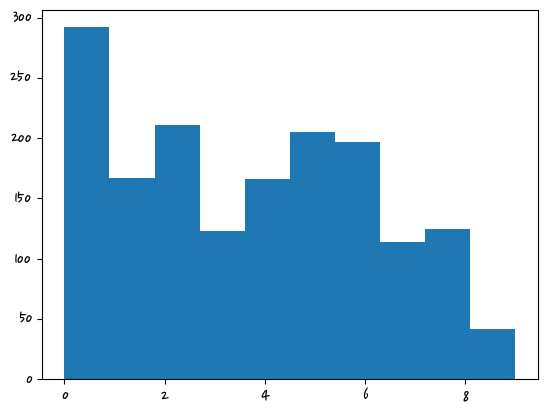

In [78]:
# 카테고리별 관객수 확인
plt.hist(data['box_office'])

### 디시전트리, 랜덤포레스트, 로지스틱회귀, knn, xgb

In [79]:
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [80]:
xgb_clf = XGBClassifier(n_estimators=1500, eval_metric='logloss')

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

In [81]:
# 스크린, 상영회수, dir_pre_cnt, dir_pre_aud, 상영등급, 장르 포함

y = data['box_office']
X = data.drop(columns=['box_office', 'sum_audience', 'year'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0
RandomForestClassifier 정확도 : 0.869// 정밀도: 0.848// 재현율: 0.84// F1스코어 macro 0.841// F1스코어 micro: 0.869
LogisticRegression 정확도 : 0.152// 정밀도: 0.077// 재현율: 0.19// F1스코어 macro 0.109// F1스코어 micro: 0.152
KNeighborsClassifier 정확도 : 0.991// 정밀도: 0.99// 재현율: 0.992// F1스코어 macro 0.991// F1스코어 micro: 0.991
XGBClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0


In [82]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        59
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00         8

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329



In [83]:
# dir_pre_cnt, dir_pre_aud, 상영등급, 장르 포함

y = data['box_office']
X = data.drop(columns=['screens', 'shows', 'box_office', 'sum_audience', 'year'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 0.997// 정밀도: 0.997// 재현율: 0.998// F1스코어 macro 0.997// F1스코어 micro: 0.997
RandomForestClassifier 정확도 : 0.833// 정밀도: 0.829// 재현율: 0.806// F1스코어 macro 0.815// F1스코어 micro: 0.833
LogisticRegression 정확도 : 0.067// 정밀도: 0.007// 재현율: 0.1// F1스코어 macro 0.013// F1스코어 micro: 0.067
KNeighborsClassifier 정확도 : 0.988// 정밀도: 0.985// 재현율: 0.988// F1스코어 macro 0.986// F1스코어 micro: 0.988
XGBClassifier 정확도 : 0.997// 정밀도: 0.997// 재현율: 0.998// F1스코어 macro 0.997// F1스코어 micro: 0.997


In [84]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        28
           2       1.00      0.98      0.99        48
           3       0.97      1.00      0.98        28
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        14

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329



In [85]:
# 스크린, 상영회수, 상영등급, 장르 포함

y = data['box_office']
X = data.drop(columns=['box_office', 'sum_audience', 'year', 'dir_pre_cnt', 'dir_pre_aud'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 0.571// 정밀도: 0.567// 재현율: 0.554// F1스코어 macro 0.55// F1스코어 micro: 0.571
RandomForestClassifier 정확도 : 0.571// 정밀도: 0.544// 재현율: 0.514// F1스코어 macro 0.511// F1스코어 micro: 0.571
LogisticRegression 정확도 : 0.298// 정밀도: 0.232// 재현율: 0.271// F1스코어 macro 0.235// F1스코어 micro: 0.298
KNeighborsClassifier 정확도 : 0.568// 정밀도: 0.561// 재현율: 0.551// F1스코어 macro 0.55// F1스코어 micro: 0.568
XGBClassifier 정확도 : 0.614// 정밀도: 0.623// 재현율: 0.583// F1스코어 macro 0.581// F1스코어 micro: 0.614


In [86]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        60
           1       0.58      0.41      0.48        34
           2       0.56      0.55      0.55        42
           3       0.45      0.39      0.42        23
           4       0.49      0.66      0.56        32
           5       0.47      0.44      0.45        34
           6       0.64      0.60      0.62        45
           7       0.58      0.54      0.56        26
           8       0.63      1.00      0.77        22
           9       1.00      0.36      0.53        11

    accuracy                           0.61       329
   macro avg       0.62      0.58      0.58       329
weighted avg       0.62      0.61      0.61       329



In [87]:
# 상영등급, 장르 포함

y = data['box_office']
X = data.drop(columns=['screens', 'shows', 'box_office', 'sum_audience', 'year', 'dir_pre_cnt', 'dir_pre_aud'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 0.149// 정밀도: 0.137// 재현율: 0.139// F1스코어 macro 0.129// F1스코어 micro: 0.149
RandomForestClassifier 정확도 : 0.164// 정밀도: 0.192// 재현율: 0.165// F1스코어 macro 0.157// F1스코어 micro: 0.164
LogisticRegression 정확도 : 0.204// 정밀도: 0.15// 재현율: 0.176// F1스코어 macro 0.133// F1스코어 micro: 0.204
KNeighborsClassifier 정확도 : 0.146// 정밀도: 0.124// 재현율: 0.14// F1스코어 macro 0.121// F1스코어 micro: 0.146
XGBClassifier 정확도 : 0.158// 정밀도: 0.168// 재현율: 0.146// F1스코어 macro 0.136// F1스코어 micro: 0.158


In [88]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.18      0.33      0.24        42
           1       0.14      0.03      0.05        35
           2       0.19      0.16      0.17        45
           3       0.04      0.05      0.04        19
           4       0.43      0.07      0.12        42
           5       0.12      0.15      0.13        41
           6       0.18      0.27      0.22        49
           7       0.08      0.05      0.06        22
           8       0.10      0.15      0.12        20
           9       0.20      0.21      0.21        14

    accuracy                           0.16       329
   macro avg       0.17      0.15      0.14       329
weighted avg       0.18      0.16      0.15       329



### XGB, LGBM

#### py xgb

In [89]:
import xgboost as xgb
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

from xgboost import plot_importance

In [90]:
# 스크린, 상영회수, dir_pre_cnt, dir_pre_aud, 상영등급, 장르 포함

y = data['box_office']
X = data.drop(columns=['box_office', 'sum_audience', 'year'])
X = data.drop(columns=['screens', 'shows', 'box_office', 'sum_audience', 'year'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1)


In [91]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [92]:
params = {
    'max_depth': 3,
    'eta': 0.05,
    # 'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 1500
eval_list = [(dtr, 'train'), (dval, 'eval')]

In [93]:
xgb_model = xgb.train(params, dtr, num_rounds, evals=eval_list, early_stopping_rounds=50)

[0]	train-logloss:-3.22856	eval-logloss:-2.87891
[1]	train-logloss:-66.18797	eval-logloss:-61.81847
[2]	train-logloss:-93.68314	eval-logloss:-87.77033
[3]	train-logloss:-93.98518	eval-logloss:-88.03858
[4]	train-logloss:-99.53373	eval-logloss:-92.70857
[5]	train-logloss:-99.61591	eval-logloss:-92.79620
[6]	train-logloss:-99.73443	eval-logloss:-92.92226
[7]	train-logloss:-104.11112	eval-logloss:-97.55987
[8]	train-logloss:-104.11787	eval-logloss:-97.56746
[9]	train-logloss:-104.12417	eval-logloss:-97.57452
[10]	train-logloss:-104.12992	eval-logloss:-97.58107
[11]	train-logloss:-104.13538	eval-logloss:-97.58718
[12]	train-logloss:-104.14041	eval-logloss:-97.59287
[13]	train-logloss:-104.14520	eval-logloss:-97.59818
[14]	train-logloss:-104.14956	eval-logloss:-97.60315
[15]	train-logloss:-104.15366	eval-logloss:-97.60779
[16]	train-logloss:-104.15761	eval-logloss:-97.61215
[17]	train-logloss:-104.16117	eval-logloss:-97.61623
[18]	train-logloss:-104.16462	eval-logloss:-97.62006
[19]	train-l

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

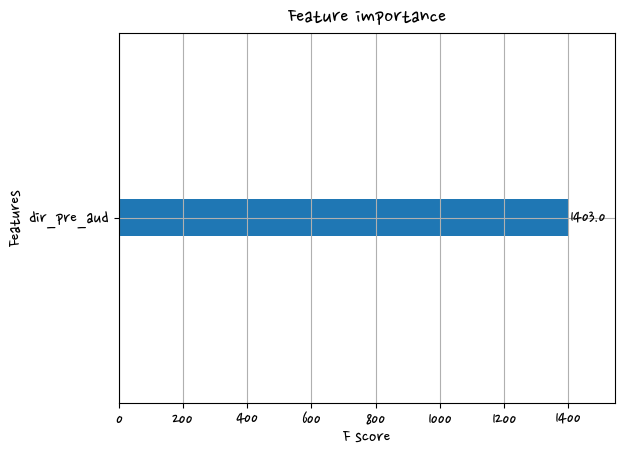

In [94]:
plot_importance(xgb_model)

In [95]:
# dir_pre_cnt, dir_pre_aud, 상영등급, 장르 포함

y = data['box_office']
X = data.drop(columns=['screens', 'shows', 'box_office', 'sum_audience', 'year'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1)


In [96]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [97]:
params = {
    'max_depth': 3,
    'eta': 0.05,
    # 'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 1500
eval_list = [(dtr, 'train'), (dval, 'eval')]

In [98]:
xgb_model = xgb.train(params, dtr, num_rounds, evals=eval_list, early_stopping_rounds=50)

[0]	train-logloss:-3.23710	eval-logloss:-3.39834
[1]	train-logloss:-66.87911	eval-logloss:-67.47555
[2]	train-logloss:-94.56996	eval-logloss:-96.10500
[3]	train-logloss:-94.85633	eval-logloss:-96.32757
[4]	train-logloss:-100.06363	eval-logloss:-99.97633
[5]	train-logloss:-100.14584	eval-logloss:-100.06324
[6]	train-logloss:-100.26438	eval-logloss:-100.18868
[7]	train-logloss:-104.64108	eval-logloss:-104.82567
[8]	train-logloss:-104.64785	eval-logloss:-104.83272
[9]	train-logloss:-104.65418	eval-logloss:-104.83923
[10]	train-logloss:-104.65995	eval-logloss:-104.84532
[11]	train-logloss:-104.66537	eval-logloss:-104.85098
[12]	train-logloss:-104.67048	eval-logloss:-104.85626
[13]	train-logloss:-104.67529	eval-logloss:-104.86118
[14]	train-logloss:-104.67966	eval-logloss:-104.86579
[15]	train-logloss:-104.68375	eval-logloss:-104.87010
[16]	train-logloss:-104.68773	eval-logloss:-104.87413
[17]	train-logloss:-104.69131	eval-logloss:-104.87791
[18]	train-logloss:-104.69477	eval-logloss:-104.8

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

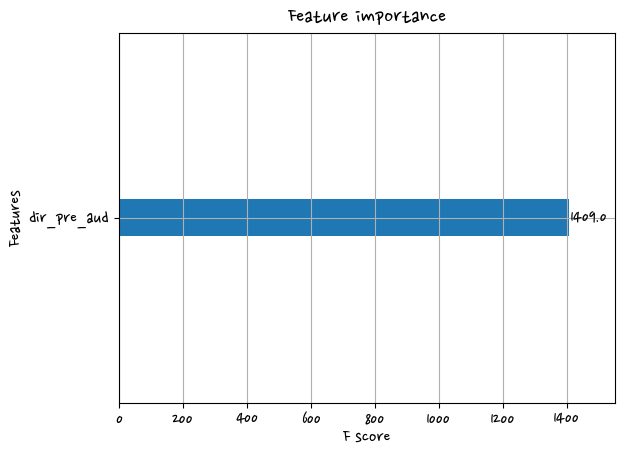

In [99]:
plot_importance(xgb_model)

In [100]:
# 스크린, 상영회수, 상영등급, 장르 포함

y = data['box_office']
X = data.drop(columns=['box_office', 'sum_audience', 'year', 'dir_pre_cnt', 'dir_pre_aud'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1)


In [101]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [102]:
params = {
    'max_depth': 3,
    'eta': 0.05,
    # 'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 1500
eval_list = [(dtr, 'train'), (dval, 'eval')]

In [103]:
xgb_model = xgb.train(params, dtr, num_rounds, evals=eval_list, early_stopping_rounds=50)

[0]	train-logloss:-3.21294	eval-logloss:-2.34374
[1]	train-logloss:-54.96473	eval-logloss:-38.58917
[2]	train-logloss:-90.76842	eval-logloss:-69.88046
[3]	train-logloss:-97.74493	eval-logloss:-77.73006
[4]	train-logloss:-98.01666	eval-logloss:-77.86879
[5]	train-logloss:-98.72981	eval-logloss:-78.34418
[6]	train-logloss:-104.09863	eval-logloss:-85.55193
[7]	train-logloss:-104.10654	eval-logloss:-85.56142
[8]	train-logloss:-104.12674	eval-logloss:-85.57636
[9]	train-logloss:-104.15346	eval-logloss:-85.60872
[10]	train-logloss:-104.34946	eval-logloss:-85.85789
[11]	train-logloss:-104.35736	eval-logloss:-85.86567
[12]	train-logloss:-104.44898	eval-logloss:-85.87341
[13]	train-logloss:-104.45328	eval-logloss:-85.87521
[14]	train-logloss:-104.50693	eval-logloss:-85.89580
[15]	train-logloss:-104.98776	eval-logloss:-86.13936
[16]	train-logloss:-104.99000	eval-logloss:-86.14609
[17]	train-logloss:-104.99219	eval-logloss:-86.15391
[18]	train-logloss:-104.99687	eval-logloss:-86.16644
[19]	train-

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

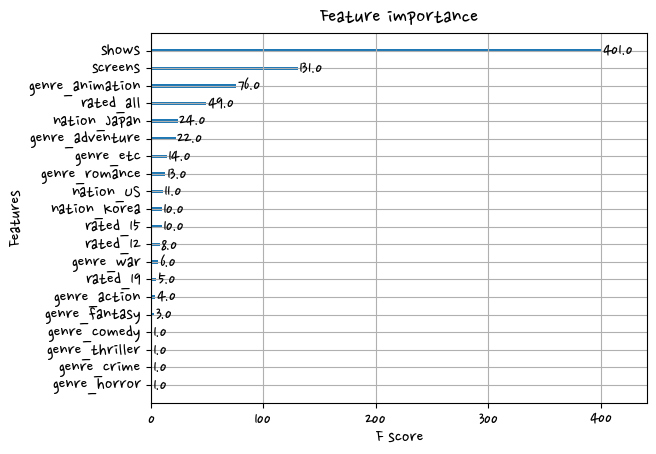

In [104]:
plot_importance(xgb_model)

In [105]:
# 상영등급, 장르 포함

y = data['box_office']
X = data.drop(columns=['screens', 'shows', 'box_office', 'sum_audience', 'year', 'dir_pre_cnt', 'dir_pre_aud'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1)


In [106]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [107]:
params = {
    'max_depth': 3,
    'eta': 0.05,
    # 'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 1500
eval_list = [(dtr, 'train'), (dval, 'eval')]

In [108]:
xgb_model = xgb.train(params, dtr, num_rounds, evals=eval_list, early_stopping_rounds=50)

[0]	train-logloss:-1.69515	eval-logloss:-1.58508
[1]	train-logloss:-5.43831	eval-logloss:-5.19338
[2]	train-logloss:-65.80683	eval-logloss:-64.17226
[3]	train-logloss:-68.51641	eval-logloss:-65.28730
[4]	train-logloss:-91.58903	eval-logloss:-85.57342
[5]	train-logloss:-93.91922	eval-logloss:-85.64507
[6]	train-logloss:-93.95629	eval-logloss:-85.72002
[7]	train-logloss:-94.00415	eval-logloss:-85.81311
[8]	train-logloss:-95.17369	eval-logloss:-87.41217
[9]	train-logloss:-95.21593	eval-logloss:-87.52485
[10]	train-logloss:-95.60716	eval-logloss:-88.12035
[11]	train-logloss:-97.04338	eval-logloss:-91.77197
[12]	train-logloss:-97.07304	eval-logloss:-93.86727
[13]	train-logloss:-97.10040	eval-logloss:-93.88554
[14]	train-logloss:-97.04611	eval-logloss:-94.37312
[15]	train-logloss:-97.04750	eval-logloss:-94.40194
[16]	train-logloss:-97.04781	eval-logloss:-94.89442
[17]	train-logloss:-97.04781	eval-logloss:-94.89442
[18]	train-logloss:-97.04781	eval-logloss:-94.89442
[19]	train-logloss:-97.047

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

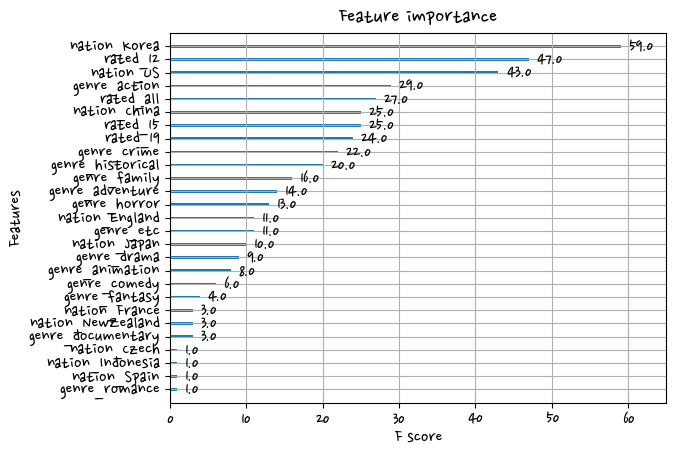

In [109]:
plot_importance(xgb_model)

#### sklearn xgb

In [117]:
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

In [118]:
xgb_clf = XGBClassifier(n_estimators=1500, learning_rate=0.5, eval_metric='logloss')

In [119]:
# 스크린, 상영회수, dir_pre_cnt, dir_pre_aud, 상영등급, 장르 포함

y = data['box_office']
X = data.drop(columns=['box_office', 'sum_audience', 'year'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)


In [120]:
xgb_clf.fit(X_train,y_train, verbose=True)
pred = model.predict(X_test)

# accuracy = accuracy_score(y_test,pred)
# precision = precision_score(y_test,pred, average='macro')
# recall = recall_score(y_test,pred, average='macro')
# f1_macro = f1_score(y_test, pred, average='macro')
# f1_micro = f1_score(y_test, pred, average='micro')
    
# model_name = model.__class__.__name__
# print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')
    
    

ValueError: Feature shape mismatch, expected: 44, got 48

In [ ]:
plot_importance(xgb_clf)

In [114]:
# dir_pre_cnt, dir_pre_aud, 상영등급, 장르 포함

y = data['box_office']
X = data.drop(columns=['screens', 'shows', 'box_office', 'sum_audience', 'year'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)


In [115]:
xgb_clf.fit(X_train,y_train)
pred = model.predict(X_test)

accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred, average='macro')
recall = recall_score(y_test,pred, average='macro')
f1_macro = f1_score(y_test, pred, average='macro')
f1_micro = f1_score(y_test, pred, average='micro')
    
model_name = model.__class__.__name__
print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')
    
    

ValueError: Feature shape mismatch, expected: 44, got 46

In [ ]:
plot_importance(xgb_clf)

In [ ]:
# 스크린, 상영회수, 상영등급, 장르 포함

y = data['box_office']
X = data.drop(columns=['box_office', 'sum_audience', 'year', 'dir_pre_cnt', 'dir_pre_aud'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)


In [ ]:
xgb_clf.fit(X_train,y_train)
pred = model.predict(X_test)

accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred, average='macro')
recall = recall_score(y_test,pred, average='macro')
f1_macro = f1_score(y_test, pred, average='macro')
f1_micro = f1_score(y_test, pred, average='micro')
    
model_name = model.__class__.__name__
print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')
    
    

In [ ]:
plot_importance(xgb_clf)

In [ ]:
# 상영등급, 장르 포함

y = data['box_office']
X = data.drop(columns=['screens', 'shows', 'box_office', 'sum_audience', 'year', 'dir_pre_cnt', 'dir_pre_aud'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)


In [ ]:
xgb_clf.fit(X_train,y_train)
pred = model.predict(X_test)

accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred, average='macro')
recall = recall_score(y_test,pred, average='macro')
f1_macro = f1_score(y_test, pred, average='macro')
f1_micro = f1_score(y_test, pred, average='micro')
    
model_name = model.__class__.__name__
print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')
    
    

In [ ]:
plot_importance(xgb_clf)